In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\HP\Documents\Datasets name Online Retail Dataset\customer.xlsx")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Based on the information provided from the df.info() output, here is a breakdown of the dataset:

   Total Entries: 541,909
   Total Columns: 8

### Columns:

   InvoiceNo:
        Type: object
        Non-null entries: 541,909 (no missing values)

   StockCode:
        Type: object
        Non-null entries: 541,909 (no missing values)

   Description:
        Type: object
        Non-null entries: 540,455 (missing 1,454 values)

   Quantity:
        Type: int64
        Non-null entries: 541,909 (no missing values)

   InvoiceDate:
        Type: datetime64[ns]
        Non-null entries: 541,909 (no missing values)

   UnitPrice:
        Type: float64
        Non-null entries: 541,909 (no missing values)

   CustomerID:
        Type: float64
        Non-null entries: 406,829 (missing 135,080 values)

   Country:
        Type: object
        Non-null entries: 541,909 (no missing values)

### Memory Usage:

   The dataset uses approximately 33.1 MB of memory.

### Observations:

   The Description and CustomerID columns contain some missing values.
   The InvoiceDate is properly recognized as a datetime object, which is useful for time-based analysis.
   The CustomerID column is of type float64, but it might make more sense as an object or int if it's an identifier.


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
missing_values = df.isnull().sum()

print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

print(missing_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


## Removing Missing Values

In [8]:
# Remove rows with missing values in 'Description' and 'CustomerID' columns
df_cleaned = df.dropna(subset=['Description', 'CustomerID'])

# Confirm the removal
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Can you identify any outliers or anomalies in the dataset, such as unusually large orders or frequent returns, and what factors might explain them? 

To identify outliers or anomalies in the dataset, such as unusually large orders or frequent returns, we can use several techniques. Here, we'll focus on using the Interquartile Range (IQR) method to detect unusually large orders. This process will help us identify transactions with quantities significantly higher than typical values, which could be potential outliers.

 ### 1. Calculate the IQR:
Compute the interquartile range for the Quantity column to identify unusually large orders

In [9]:
Q1 = df_cleaned['Quantity'].quantile(0.25)
Q3 = df_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


### 2. Identify Outliers:
Filter the DataFrame to identify rows where the Quantity is significantly above the upper bound

In [10]:
outliers = df_cleaned[(df_cleaned['Quantity'] < lower_bound) | (df_cleaned['Quantity'] > upper_bound)]
large_orders = outliers[outliers['Quantity'] > upper_bound]


### 3. Analyze the Outliers:
Examine the identified outliers to understand potential factors. For example, we can look at the Description, Country, and CustomerID columns.

In [11]:
large_orders[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...,...
541835,581579,23581,JUMBO BAG PAISLEY PARK,40,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom


### 4. Visualize the Outliers:
Create a boxplot to visualize the distribution of Quantity and highlight the outliers

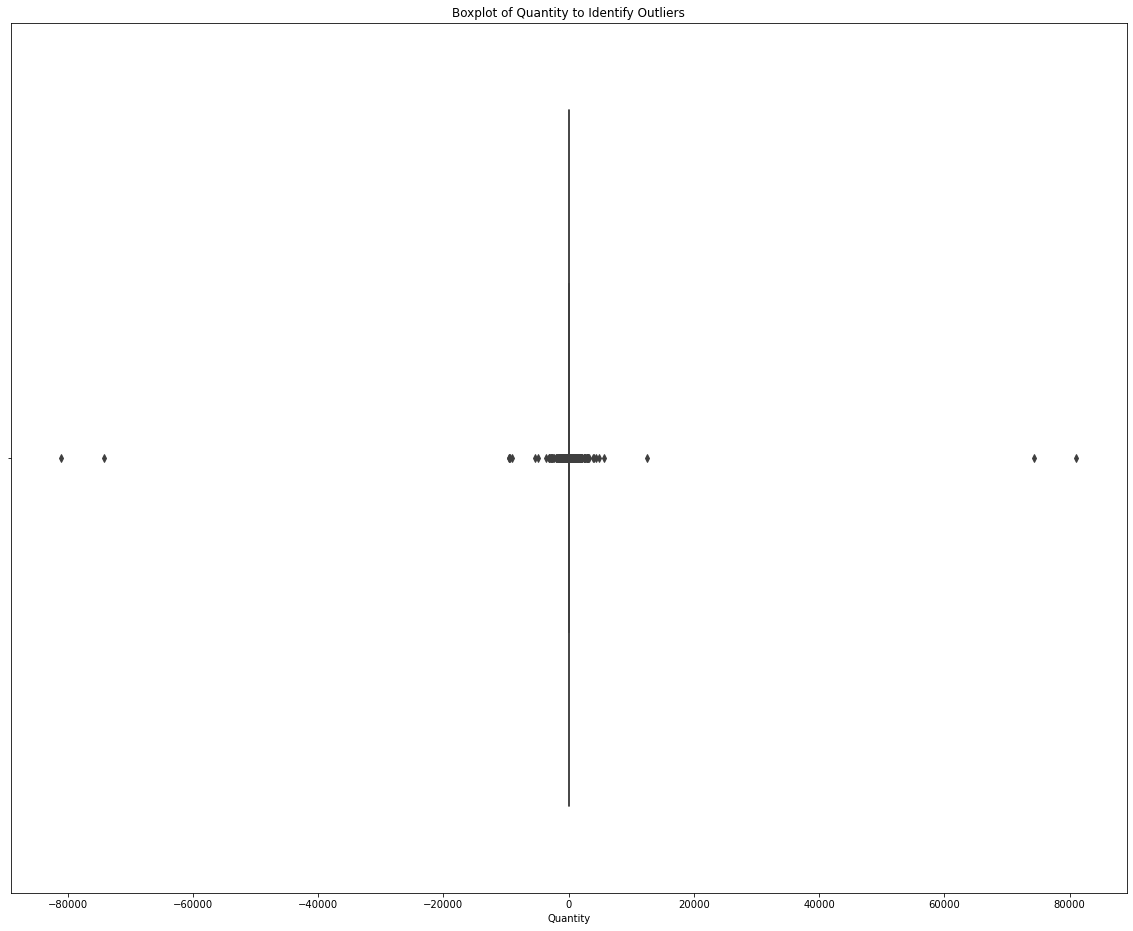

In [12]:
plt.figure(figsize=(20, 16))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity to Identify Outliers')
plt.xlabel('Quantity')
plt.show()

## Factors Explaining Outliers

   #### Unusually Large Orders:
   Bulk Purchases: Some customers may be wholesalers or retail stores making bulk purchases.
   Seasonal Demand: Certain times of the year (e.g., holiday season) may see spikes in order quantities.

   #### Frequent Returns:
   Product Issues: Defective products or products not meeting customer expectations.
   Order Errors: Mistakes in order placement leading to frequent returns (if returns are recorded as negative quantities).
   
##### By following this process, you can systematically identify and analyze outliers in the dataset, leading to insights that can improve inventory management, customer satisfaction, and overall operational efficiency